In [2]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
base_model =VGG19(weights='imagenet',include_top=False,input_shape=(32,32,3))


80134624/80134624 [==============================] - 5s 0us/step


In [6]:
for layer in base_model.layers:
  layer.trainable = False


In [7]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 20,292,170
Trainable params: 267,786
Non-trainable params: 20,024,384
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [11]:
model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/40
782/782 [==============================] - 23s 17ms/step - loss: 1.5061 - accuracy: 0.4681 - val_loss: 1.3071 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 2/40
782/782 [==============================] - 13s 16ms/step - loss: 1.3224 - accuracy: 0.5350 - val_loss: 1.2540 - val_accuracy: 0.5534 - lr: 0.0010
Epoch 3/40
782/782 [==============================] - 13s 17ms/step - loss: 1.2680 - accuracy: 0.5518 - val_loss: 1.2193 - val_accuracy: 0.5656 - lr: 0.0010
Epoch 4/40
782/782 [==============================] - 14s 17ms/step - loss: 1.2361 - accuracy: 0.5649 - val_loss: 1.1952 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 5/40
782/782 [==============================] - 14s 17ms/step - loss: 1.2086 - accuracy: 0.5752 - val_loss: 1.1772 - val_accuracy: 0.5883 - lr: 0.0010
Epoch 6/40
782/782 [==============================] - 13s 17ms/step - loss: 1.1846 - accuracy: 0.5826 - val_loss: 1.1827 - val_accuracy: 0.5847 - lr: 0.0010
Epoch 7/40
782/782 [==============================] - 14s 

In [12]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

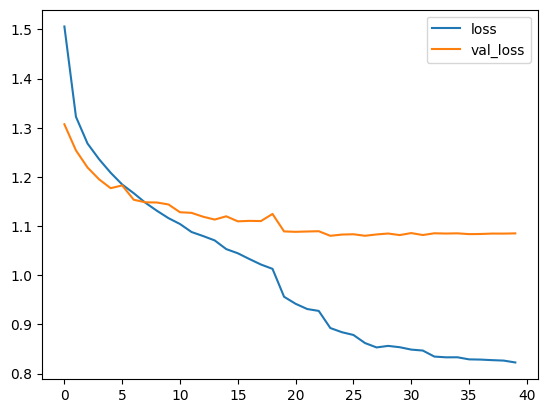

In [13]:
metrics[['loss','val_loss']].plot()

<Axes: >

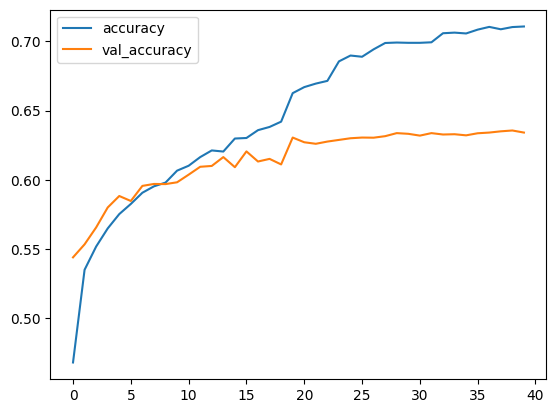

In [14]:

metrics[['accuracy','val_accuracy']].plot()

In [15]:
x_test_predictions = np.argmax(model.predict(x_test), axis=1)



313/313 [==============================] - 3s 9ms/step


In [17]:
print(confusion_matrix(y_test,x_test_predictions))


[[714  22  51  22  20  13  13  16  93  36]
 [ 34 707  16  29  12  12  20  14  47 109]
 [ 59  20 528  72  93  63  98  33  23  11]
 [ 17  41  69 469  57 141  98  40  26  42]
 [ 20  16  80  70 576  41  93  64  24  16]
 [ 16  26  53 186  63 514  58  51  10  23]
 [ 10  19  50  48  74  41 725   8  16   9]
 [ 16  12  48  42  67  66  22 676   8  43]
 [ 75  58  20  19  15   1  10  10 751  41]
 [ 31 129  13  30  10  14  18  25  49 681]]


In [18]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1000
           1       0.67      0.71      0.69      1000
           2       0.57      0.53      0.55      1000
           3       0.48      0.47      0.47      1000
           4       0.58      0.58      0.58      1000
           5       0.57      0.51      0.54      1000
           6       0.63      0.72      0.67      1000
           7       0.72      0.68      0.70      1000
           8       0.72      0.75      0.73      1000
           9       0.67      0.68      0.68      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

